In [3]:
import os
import tarfile
from six.moves import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

DOWNLOAD_ROOT = "http://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


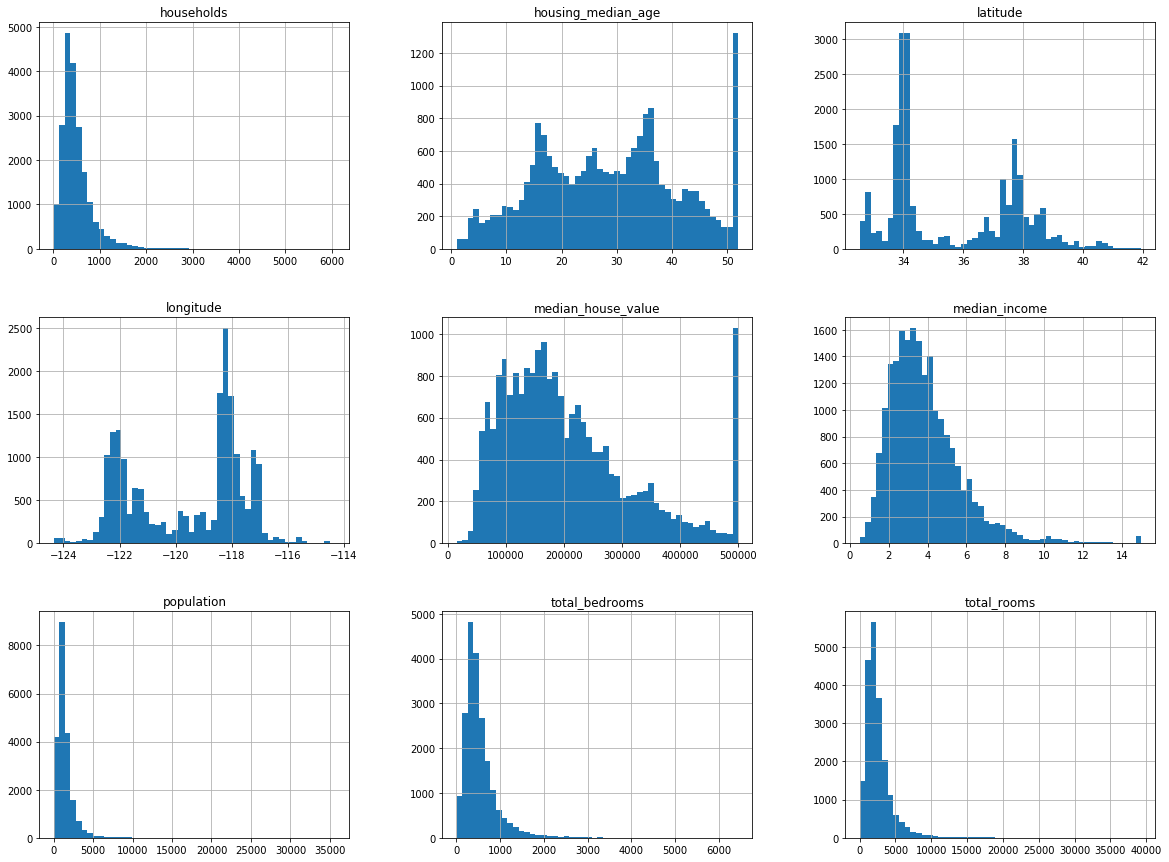

In [10]:
%matplotlib inline
housing.hist(bins=50, figsize = (20,15))
plt.show()

In [21]:
np.random.seed(42)

In [12]:
#Setting aside test set
def split_test_train(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [39]:
train_set, test_set = split_test_train(housing, 0.2)
print(len(train_set), "Train,", len(test_set), "Test")

16512 Train, 4128 Test


In [13]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [14]:
#Using build in train_test_split instead of hash function
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 0)

In [15]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

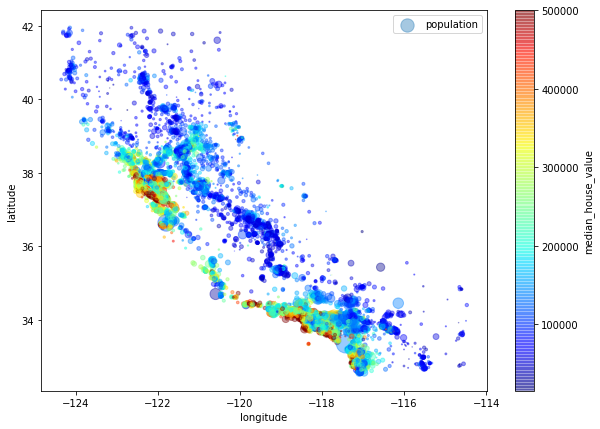

In [71]:
#Visualizing the data
housing = strat_train_set.copy()
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "population", figsize = (10,7),
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True, sharex = False)


In [18]:
corr_matrix = housing.corr()

In [77]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688883
total_rooms           0.137469
housing_median_age    0.107144
households            0.069177
total_bedrooms        0.053544
population           -0.023797
longitude            -0.043236
latitude             -0.145570
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8d123dcd0>,
      dtype=object)

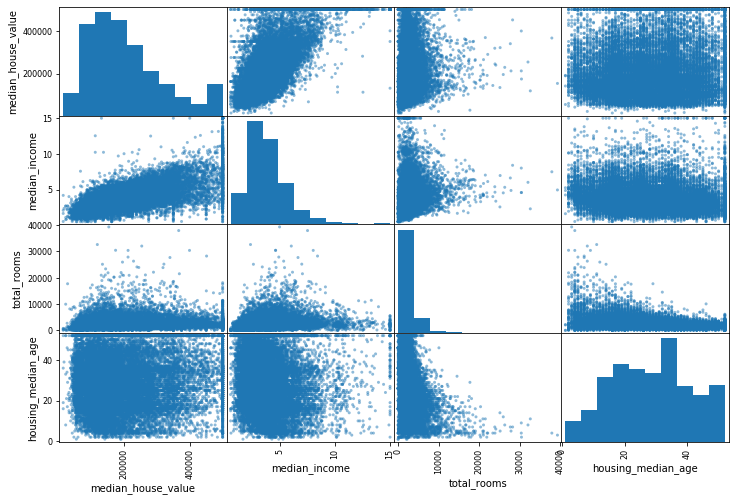

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], figsize = (12,8))

[0, 16, 0, 550000]

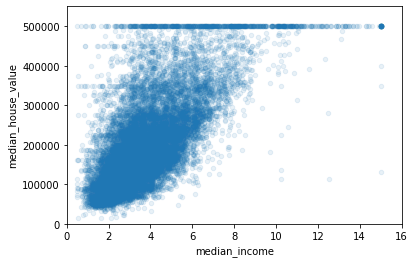

In [83]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)
plt.axis([0,16,0,550000])

In [20]:
#Make new attributes
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

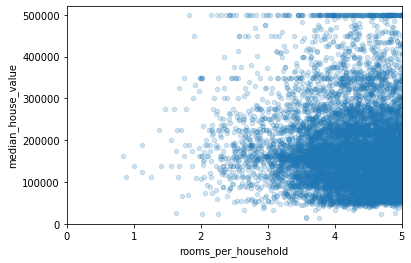

In [22]:
housing.plot(kind = "scatter", x = "rooms_per_household", y = "median_house_value",
            alpha = 0.2)
plt.axis([0,5,0,520000])
plt.show()

In [23]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.006686,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.054618,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000,141.909091,1.000000,1243.333333


In [24]:
#Preparing the Data for the machine learning algorithms
housing = strat_train_set.drop("median_house_value", axis = 1) #dropping labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [25]:
#Using Imputer to handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

#can only use Imputer on numeric values
housing_num = housing.select_dtypes(include = [np.number]) 
imputer.fit(housing_num)
imputer.statistics_
#housing_num.median().values ->  Check that imputer.statistics_ is the correct medians

array([-118.49  ,   34.25  ,   29.    , 2128.5   ,  436.    , 1167.    ,
        410.    ,    3.5341])

In [26]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [27]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
10275,-117.87,33.86,28.0,2292.0,531.0,2197.0,509.0,3.4856
20601,-121.57,39.13,30.0,442.0,103.0,413.0,88.0,1.5694
20138,-119.05,34.40,50.0,1236.0,282.0,1079.0,257.0,2.6991
18028,-121.94,37.24,35.0,1484.0,244.0,664.0,238.0,4.6750
16289,-121.30,37.92,28.0,3308.0,766.0,3201.0,720.0,1.7694


In [28]:
imputer.strategy

'median'

In [30]:
#Processing the categorical features
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
10275,<1H OCEAN
20601,INLAND
20138,<1H OCEAN
18028,<1H OCEAN
16289,INLAND
4622,<1H OCEAN
15280,NEAR OCEAN
17228,<1H OCEAN
14268,NEAR OCEAN
1229,INLAND


In [42]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [43]:
#One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
#Custom Transformer
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        
        if self.add_bedrooms_per_room:
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [48]:
#Feature Scaling 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),    
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [54]:
#Transform the column
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer
    
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(housing)

In [58]:
housing_prepared.shape

(16512, 16)

In [59]:
#Evaluating the training set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
dummy_data = housing.iloc[:5]
dummy_labels = housing_labels.iloc[:5]
dummy_data_prepared = full_pipeline.transform(dummy_data)
print("Prediction:", lin_reg.predict(dummy_data_prepared))
print("Labels:", list(dummy_labels))

Prediction: [172713.58885788  43130.16935351 195014.22158132 268919.62476372
  44875.4698183 ]
Labels: [142800.0, 57900.0, 181300.0, 245300.0, 73900.0]


In [74]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68284.24083518104

In [64]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [69]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

def display_results(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

display_results(tree_rmse_scores)

Scores: [71826.24114736 71987.49047683 72813.94103643 71710.59320631
 72032.80838611 70958.50353996 74953.52883673 73203.78537439
 67485.82572876 70685.19517896]
Mean: 71765.79129118427
Standard Deviation: 1832.83310449029


In [76]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring = "neg_mean_squared_error", cv = 10)
lin_rmse = np.sqrt(-lin_scores)
display_results(lin_rmse)

Scores: [68816.92050905 69919.6105217  66113.14067776 67981.42224765
 68715.57149727 69992.34941025 67163.97848562 70841.91062928
 66611.37068257 68651.01821515]
Mean: 68480.72928763037
Standard Deviation: 1456.394289447671


In [88]:
#Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegessor()
grid_search = GridSearchC

NameError: name 'RandomForestRegessor' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 20], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True) 
grid_search.fit(housing_prepared, housing_labels)

In [98]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 20}

In [102]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

62893.62414949535 {'max_features': 2, 'n_estimators': 3}
55884.62138543618 {'max_features': 2, 'n_estimators': 10}
53492.71101831 {'max_features': 2, 'n_estimators': 20}
60084.10712627805 {'max_features': 4, 'n_estimators': 3}
52996.44115620486 {'max_features': 4, 'n_estimators': 10}
51097.627535149724 {'max_features': 4, 'n_estimators': 20}
59784.54738234164 {'max_features': 6, 'n_estimators': 3}
51926.95746138606 {'max_features': 6, 'n_estimators': 10}
50670.75196442339 {'max_features': 6, 'n_estimators': 20}
59559.3151469049 {'max_features': 8, 'n_estimators': 3}
52353.79969219829 {'max_features': 8, 'n_estimators': 10}
50870.16260297134 {'max_features': 8, 'n_estimators': 20}
62399.004073242 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54597.9728583833 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60108.73153840981 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53024.7393335629 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58337

In [106]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.25956928e-02, 6.55572144e-02, 4.29841488e-02, 1.79944615e-02,
       1.69434705e-02, 1.76854019e-02, 1.56931432e-02, 2.79926119e-01,
       4.92327788e-02, 1.12644570e-01, 1.22044792e-01, 8.17461944e-03,
       1.72294678e-01, 2.67725538e-04, 2.60377907e-03, 3.35740487e-03])

In [120]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse = True)


[(0.2799261191686316, 'median_income'),
 (0.17229467798152726, 'INLAND'),
 (0.12204479161034561, 'bedrooms_per_room'),
 (0.11264457041325142, 'pop_per_hhold'),
 (0.07259569282956782, 'longitude'),
 (0.06555721442049622, 'latitude'),
 (0.04923277879695355, 'rooms_per_hhold'),
 (0.04298414882268299, 'housing_median_age'),
 (0.017994461499712948, 'total_rooms'),
 (0.017685401853691697, 'population'),
 (0.016943470459040138, 'total_bedrooms'),
 (0.015693143232788045, 'households'),
 (0.00817461943532134, '<1H OCEAN'),
 (0.00335740486910359, 'NEAR OCEAN'),
 (0.0026037790693611935, 'NEAR BAY'),
 (0.00026772553752463186, 'ISLAND')]

In [124]:
#Evaluating the test set
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49262.299758049216

In [123]:
#Confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([47159.81881233, 51278.64901197])

In [129]:
#full pipeline in one 
full_pipeline_with_prediction = Pipeline([
    ("prediction", full_pipeline),
    ("linearRegression", LinearRegression())
])
full_pipeline_with_prediction.fit(housing, housing_labels)
full_pipeline_with_prediction.predict(dummy_data)

array([172713.58885788,  43130.16935351, 195014.22158132, 268919.62476372,
        44875.4698183 ])